In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PRE-PROCESSING

In [3]:
ML_df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [4]:
ML_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
ML_df['Gender'].replace({'Male':0,'Female':1},inplace=True)
ML_df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [6]:
ML_df.shape

(10000, 11)

In [7]:
ML_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0


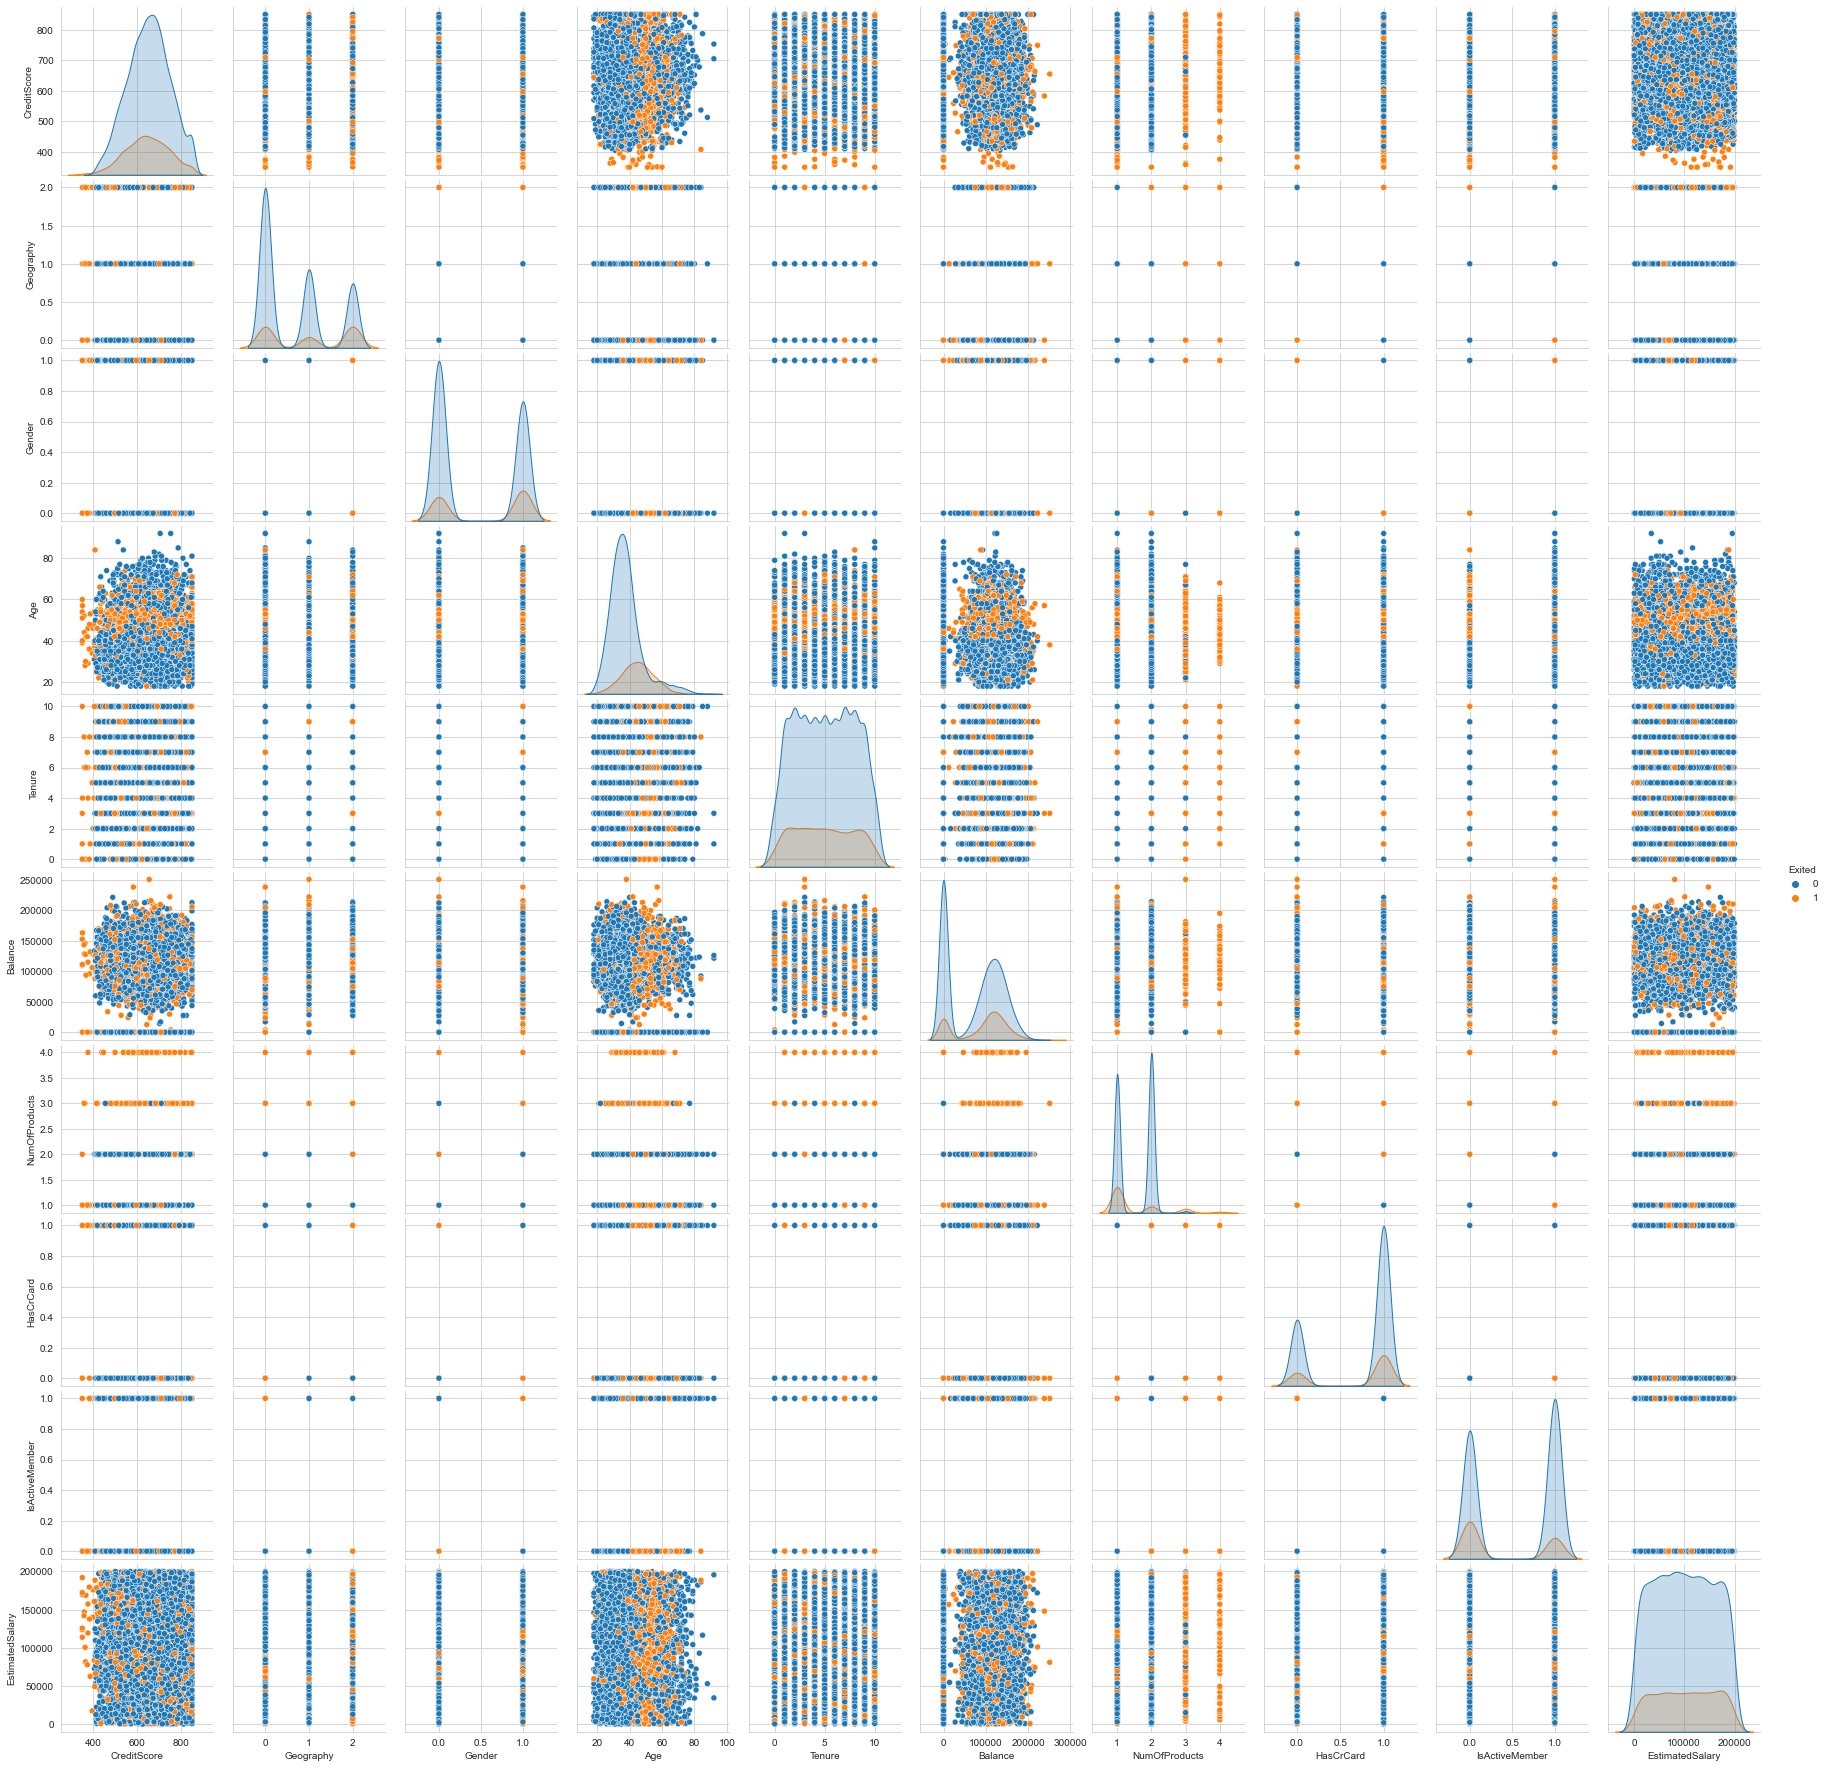

In [8]:
sns.pairplot(ML_df,hue='Exited')

# MODEL BUILDING

In [9]:
ML_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# # Dividing dependent and independent variables
X = ML_df.drop("Exited", axis=1)
y = ML_df["Exited"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.8
precision score of the model is 0.4827586206896552
recall score of the model is 0.08450704225352113
f1_score of the model is 0.14383561643835618


Text(34.0, 0.5, 'Actual Label')

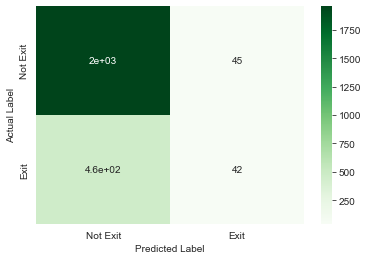

In [14]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [16]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.7948
precision score of the model is 0.4843137254901961
recall score of the model is 0.4969818913480885
f1_score of the model is 0.490566037735849


Text(34.0, 0.5, 'Actual Label')

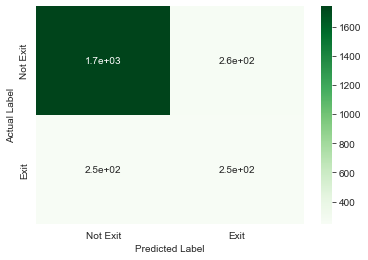

In [17]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [19]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.8728
precision score of the model is 0.7896440129449838
recall score of the model is 0.4909456740442656
f1_score of the model is 0.6054590570719602


In [20]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1938,   65],
       [ 253,  244]])

Text(34.0, 0.5, 'Actual Label')

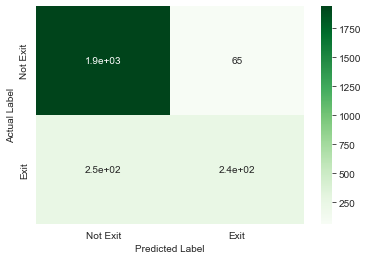

In [21]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [23]:
acc_score=accuracy_score(y_test, y_pred)   # Accuracy = TP+TN/TP+FP+FN+TN
p_score=precision_score(y_test,y_pred)     # Precision = TP/TP+FP
re_score=recall_score(y_test,y_pred)       # Recall = TP/TP+FN
f_score=f1_score(y_test,y_pred)            #F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print(f'Accuracy score of the model is {acc_score}')
print(f'precision score of the model is {p_score}')
print(f'recall score of the model is {re_score}')
print(f'f1_score of the model is {f_score}')

Accuracy score of the model is 0.7996
precision score of the model is 0.25
recall score of the model is 0.004024144869215292
f1_score of the model is 0.007920792079207921


Text(34.0, 0.5, 'Actual Label')

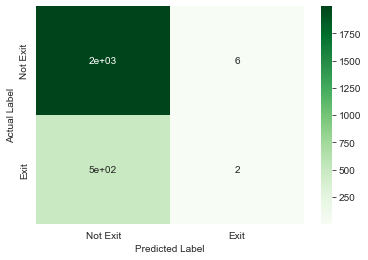

In [24]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# CREATING CSV FILE

In [25]:
ML_df.to_csv("featured_ML.csv")